In [135]:
# Imports
import pandas as pd
import numpy as np
import json as json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [136]:
 # Loading the data from CSV into panadas dataframe
tempIncomeStatement = pd.read_csv (r'../data/income_statement.csv', sep=',')
tempCashFlow = pd.read_csv (r'../data/cash_flow.csv', sep=',')
tempBalanceSheet = pd.read_csv (r'../data/balance-sheet.csv', sep=',')
tempEarnings = pd.read_csv (r'../data/EARNINGS.csv', sep=',')

tempMonthly = pd.read_csv (r'../data/monthly-data.csv', sep=',')
TickerSymbols = pd.read_csv (r'../data/nasdaq_screener_sorted_values.csv', sep=',')

In [137]:
# Printing Income statement
print(tempIncomeStatement)
print(tempIncomeStatement.columns)

# Printing Cash Flow
print(tempCashFlow.shape)
print(tempCashFlow.columns)

# Printing Balance Sheet
print(tempBalanceSheet.shape)
print(tempBalanceSheet.columns)

# Printing Earnings
print(tempEarnings.shape)
print(tempEarnings.columns)

     fiscalDateEnding reportedCurrency  grossProfit  totalRevenue  \
0          2021-09-30              USD  35174000000   82688000000   
1          2021-06-30              USD  35255000000   80769000000   
2          2021-03-31              USD  38079000000   88914000000   
3          2020-12-31              USD  44328000000  110801000000   
4          2020-09-30              USD  24689000000   64698000000   
...               ...              ...          ...           ...   
3899       2017-05-31              USD    345500000     572700000   
3900       2017-02-28              USD    325900000     566400000   
3901       2016-11-30              USD    356900000     623700000   
3902       2016-08-31              USD    326900000     597300000   
3903       2016-05-31              USD    248800000     710500000   

     costOfRevenue costofGoodsAndServicesSold operatingIncome  \
0      53802000000                48186000000     23786000000   
1      51591000000                4617900

In [138]:
# renaming Balance sheet column "fiscalDateEnding" to "timestamp" to match column name on both dataframes
tempIncomeStatement = tempIncomeStatement.rename(columns={"fiscalDateEnding": "timestamp"})
tempCashFlow = tempCashFlow.rename(columns={"fiscalDateEnding": "timestamp"})
tempBalanceSheet = tempBalanceSheet.rename(columns={"fiscalDateEnding": "timestamp"})
tempEarnings = tempEarnings.rename(columns={"fiscalDateEnding": "timestamp"})

# Merging all 4 frames into one

# Daily dates does not overlap on both dataframes, CompanyMonthly has the last trading day (not including weekends)
# While CompanyBalanaceSheet always has the last day of the month (including weekends)
# We need to cut out the daily date for both dataframes["timestamp"], to be able to merge them properly.
# Slicing the timestamp in CompanyMonthly, removing the days
sliceMonthly = tempMonthly["timestamp"].str.slice(0, -3)
tempMonthly["timestamp"] = sliceMonthly

# Printing
print("Monthly Data:")
print(tempMonthly["timestamp"])

# Slicing the timestamp in Income Statement, removing the days
sliceIncomestatement = tempIncomeStatement["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempIncomeStatement["timestamp"] = sliceIncomestatement

# Slicing the timestamp in Cash Flow, removing the days
sliceCashFlow = tempCashFlow["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempCashFlow["timestamp"] = sliceCashFlow

# Slicing the timestamp in CompanyBalanceSheet, removing the days
sliceBalanceSheet = tempBalanceSheet["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempBalanceSheet["timestamp"] = sliceBalanceSheet

# Slicing the timestamp in Earnings, removing the days
sliceEarnings = tempEarnings["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempEarnings["timestamp"] = sliceEarnings

# Printing
print("Income Statement:")
print(tempIncomeStatement["timestamp"])
print("Cash Flow:")
print(tempCashFlow["timestamp"])
print("Balance Sheet:")
print(tempBalanceSheet["timestamp"])
print("Earnings:")
print(tempEarnings["timestamp"])
print("Ticker Symbols:")
print(TickerSymbols["Symbol"])
    

Monthly Data:
0        2021-11
1        2021-10
2        2021-09
3        2021-08
4        2021-07
          ...   
43662    2000-11
43663    2000-10
43664    2000-09
43665    2000-08
43666    2000-07
Name: timestamp, Length: 43667, dtype: object
Income Statement:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3899    2017-05
3900    2017-02
3901    2016-11
3902    2016-08
3903    2016-05
Name: timestamp, Length: 3904, dtype: object
Cash Flow:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3880    2017-05
3881    2017-02
3882    2016-11
3883    2016-08
3884    2016-05
Name: timestamp, Length: 3885, dtype: object
Balance Sheet:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3852    2017-05
3853    2017-02
3854    2016-11
3855    2016-08
3856    2016-05
Name: timestamp, Length: 3857, dtype: object
Earnings:
0        2021-09
1        2021-06
2 

In [139]:
# for each company we want to make adjustments needed for each companys features and then we will merge them into one df

#------------ add error if ticker symbol is not in TickerSymbols["Symbol"] or size < 200


TickerSymbols = TickerSymbols[~TickerSymbols['Symbol'].isin(['RIVN'])]
final_df = pd.DataFrame()
counter = 0

for tickerSymbol in TickerSymbols["Symbol"]:
    counter = counter +1
    #print("this is the beginning of the forloop, tickersymbol: " + tickerSymbol + "counter = " + str(counter))
    
    # filter all dataframes for each ticketsymbol (stock)
    CompanyIncomeStatement = tempIncomeStatement.loc[tempIncomeStatement["symbol"] == tickerSymbol]
    CompanyCashFlow = tempCashFlow.loc[tempCashFlow["symbol"] == tickerSymbol]
    CompanyBalanceSheet = tempBalanceSheet.loc[tempBalanceSheet["symbol"] == tickerSymbol]
    CompanyEarnings = tempEarnings.loc[tempEarnings["symbol"] == tickerSymbol]
    CompanyMonthly = tempMonthly.loc[tempMonthly["Symbol"] == tickerSymbol]
    
    # Removing symbol for all Company dataframes
    CompanyIncomeStatement.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyCashFlow.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyBalanceSheet.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyEarnings.drop(['symbol', 'reportedDate'], axis=1, inplace=True)
    CompanyMonthly.drop(['Symbol'], axis=1, inplace=True)
    
    # Cutting out unecessary data from the CompanyMonthly
    # We only need price data in CompanyMonthly within the daterange of the 20 rows on CompanyBalanceSheet data
    # every row is 3 months in CompanyBalanceSheet. Every row in CompanyMonthly is 1 month, 3x20 = 60.
    idx = (CompanyMonthly.index[0]+60)
    CompanyMonthly = CompanyMonthly.loc[:idx]

    # calculating 1 month labels
    CompanyMonthly["1m"] = CompanyMonthly["close"].pct_change(periods = -1).shift(periods = 1)
    #print(CompanyMonthly.head(21))
    
    # merge all df into a temp df
    temp_df = pd.merge(CompanyIncomeStatement, CompanyCashFlow, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyBalanceSheet, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyEarnings, how="outer", on = "timestamp")
    #print(temp_df)
    
    # merging the rows from balance sheet and monthly on timestamp.
    merged_df = pd.merge(temp_df, CompanyMonthly, how="outer", on = "timestamp")
    
    # removing the rows over 20
    merged_df = merged_df.loc[:19]

    # calculate how much the increase is in percentage, interval of 3 months
    # also offsetting by 1, to get the labels on the correct row.
    merged_df["3m"] = merged_df["close"].pct_change(periods = -1).shift(periods = 1)
    
    # Removing the first row, because we do not have a label for it, 3 months have not passed yet for us to get the end price of the 3 month cycle
    merged_df.drop(index=merged_df.index[0], axis=0, inplace=True)

    # Also dropping columns that we do not need, symbol, Symbol, open, high, low, close, volume etc.
    merged_df.drop(['open','high','low','volume', "close"], axis=1, inplace=True)

    # replacing all "None" strings with NaN data type
    merged_df = merged_df.replace('None', np.nan)
    
    for col in merged_df.columns:
        if col != "timestamp":
            if col != "1m":
                if col != "3m":
                    merged_df[col] = merged_df[col].astype("float")
                    merged_df[col] = merged_df[col].replace(np.nan, merged_df[col].mean()) 
                    merged_df[col] = merged_df[col].pct_change(periods = -1).shift(periods = 0)

    # adding it to the final dataframe
    #print(str(col) + " Percentage difference: ")
    #print(merged_df.head(10))
    
    merged_df.drop(index=merged_df.index[-1], axis=0, inplace=True)

    final_df = pd.concat([final_df, merged_df], axis=0)
    
    for col in final_df.columns:
        if col != "timestamp":
            if col != "1m":
                if col != "3m":
                    final_df[col] = final_df[col].replace(np.nan, final_df[col].mean())



C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [140]:
print(final_df)
print(final_df.columns)
print(final_df.dtypes)
cat = ["1m", "3m"]
print(final_df[cat].head(20))


   timestamp  grossProfit  totalRevenue  costOfRevenue  \
1    2021-06    -0.074162     -0.091605      -0.092011   
2    2021-03    -0.140972     -0.197534      -0.218897   
3    2020-12     0.795455      0.712588       0.618467   
4    2020-09     0.088580      0.096799       0.074314   
5    2020-06     0.013858      0.024880       0.023010   
..       ...          ...           ...            ...   
14   2017-11     0.034502      0.019015      -0.004591   
15   2017-08     0.057019      0.056050       0.054577   
16   2017-05     0.060141      0.011123      -0.054908   
17   2017-02    -0.086859     -0.091871      -0.098951   
18   2016-11     0.091771      0.044199      -0.013314   

    costofGoodsAndServicesSold  operatingIncome  \
1                    -0.103407        -0.122787   
2                    -0.232540        -0.179847   
3                     0.677398         1.269645   
4                     0.081178         0.128638   
5                     0.029547         0.018517 

In [141]:
print(final_df["1m"].isna().sum())
print(final_df["3m"].isna().sum())

110
0


In [142]:
# deleting columns with more than 1 % nan values
m = len(final_df)
for col in merged_df.columns:
    if col != "1m" :
        if col != "3m" :
            percentageNan = ((final_df[col].isnull().sum()/m)*100)
            print(str(col) + " has " + str(percentageNan))

            if ((final_df[col].isnull().sum()/m)*100) >= 1:
                final_df.drop(col, axis=1, inplace=True)
                print(str(col) + " has been dropped.")


timestamp has 0.0
grossProfit has 0.14029180695847362
totalRevenue has 0.0
costOfRevenue has 0.7856341189674524
costofGoodsAndServicesSold has 0.9539842873176206
operatingIncome has 0.02805836139169473
sellingGeneralAndAdministrative has 0.0
researchAndDevelopment has 0.0
operatingExpenses has 0.0
investmentIncomeNet has 0.0
netInterestIncome has 2.974186307519641
netInterestIncome has been dropped.
interestIncome has 0.0
interestExpense has 2.048260381593715
interestExpense has been dropped.
nonInterestIncome has 26.964085297418634
nonInterestIncome has been dropped.
otherNonOperatingIncome has 33.36139169472503
otherNonOperatingIncome has been dropped.
depreciation has 0.0
depreciationAndAmortization has 0.0
incomeBeforeTax has 0.02805836139169473
incomeTaxExpense has 0.0
interestAndDebtExpense has 22.699214365881033
interestAndDebtExpense has been dropped.
netIncomeFromContinuingOperations has 0.02805836139169473
comprehensiveIncomeNetOfTax has 0.0
ebit has 0.02805836139169473
ebitd

In [143]:
final_df.isnull().sum()

for col in final_df.columns:
    if col != "timestamp":
        if col != "1m":
            if col != "3m":
                final_df[col] = final_df[col].replace(np.inf, final_df[col].mean()) 

final_df

,timestamp,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,...,otherNonCurrentLiabilities,totalShareholderEquity,retainedEarnings,commonStock,commonStockSharesOutstanding,reportedEPS,surprise,surprisePercentage,1m,3m
1,2021-06,-0.074162,-0.091605,-0.092011,-0.103407,-0.122787,0.018442,0.086469,0.052288,0.001393,...,-0.016977,-0.070803,-0.394994,0.014501,-0.007753,-0.071429,-0.305204,-0.322673,0.064982,0.033148
2,2021-03,-0.140972,-0.197534,-0.218897,-0.232540,-0.179847,-0.056296,0.019175,-0.020196,-0.038822,...,-0.055119,0.044606,0.067128,0.047522,-0.008141,-0.166667,0.556397,1.228511,0.076218,0.121244
3,2020-12,0.795455,0.712588,0.618467,0.677398,1.269645,0.140802,0.037164,0.088763,-0.027344,...,0.028482,0.013545,-0.044434,0.019004,-0.009042,1.301370,7.440895,3.165636,-0.005502,-0.079433
4,2020-09,0.088580,0.096799,0.074314,0.081178,0.128638,0.021735,0.046238,0.033893,-0.147614,...,-0.021653,-0.096054,-0.379930,0.042776,2.962886,0.123077,-0.776429,-0.836811,-0.060012,0.145756
5,2020-06,0.013858,0.024880,0.023010,0.029547,0.018517,-0.024435,0.042278,0.007565,-0.141087,...,-0.019350,-0.078330,-0.272618,0.013824,-0.009262,0.015625,0.750000,0.921572,0.165132,-0.682538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,2017-11,0.034502,0.019015,-0.004591,-0.004591,0.204984,0.050000,-0.099396,-0.053571,inf,...,0.106966,0.595907,0.139344,0.223523,-0.010582,-0.298824,-0.167739,1.042657,-0.038944,0.051477
15,2017-08,0.057019,0.056050,0.054577,0.054577,0.226824,0.014493,-0.034464,-0.013519,inf,...,-0.050507,0.021855,0.124424,-0.009082,-0.014104,0.133333,-0.302564,-0.400639,-0.000558,0.247348
16,2017-05,0.060141,0.011123,-0.054908,-0.054908,100.400000,0.512122,0.067346,-0.248692,inf,...,0.124199,0.003092,0.074257,-0.009990,0.019299,0.250000,-0.275093,-0.449276,-0.041763,0.038863
17,2017-02,-0.086859,-0.091871,-0.098951,-0.098951,-0.989270,0.236452,-0.126113,0.232549,inf,...,0.076640,-0.016338,-0.098214,-0.010870,-0.027389,0.006711,1.376588,0.483139,-0.021795,0.105128


1m                             1.000000
3m                             0.495484
reportedEPS                    0.218183
totalNonCurrentAssets          0.208111
profitLoss                     0.108006
otherNonCurrentLiabilities     0.082023
currentAccountsPayable         0.074505
comprehensiveIncomeNetOfTax    0.043497
depreciationAndAmortization    0.029487
cashflowFromFinancing          0.028805
shortTermInvestments           0.026337
deferredRevenue                0.025666
interestIncome                 0.019057
ebitda                         0.017579
totalCurrentAssets             0.016801
Name: 1m, dtype: float64


<AxesSubplot:>

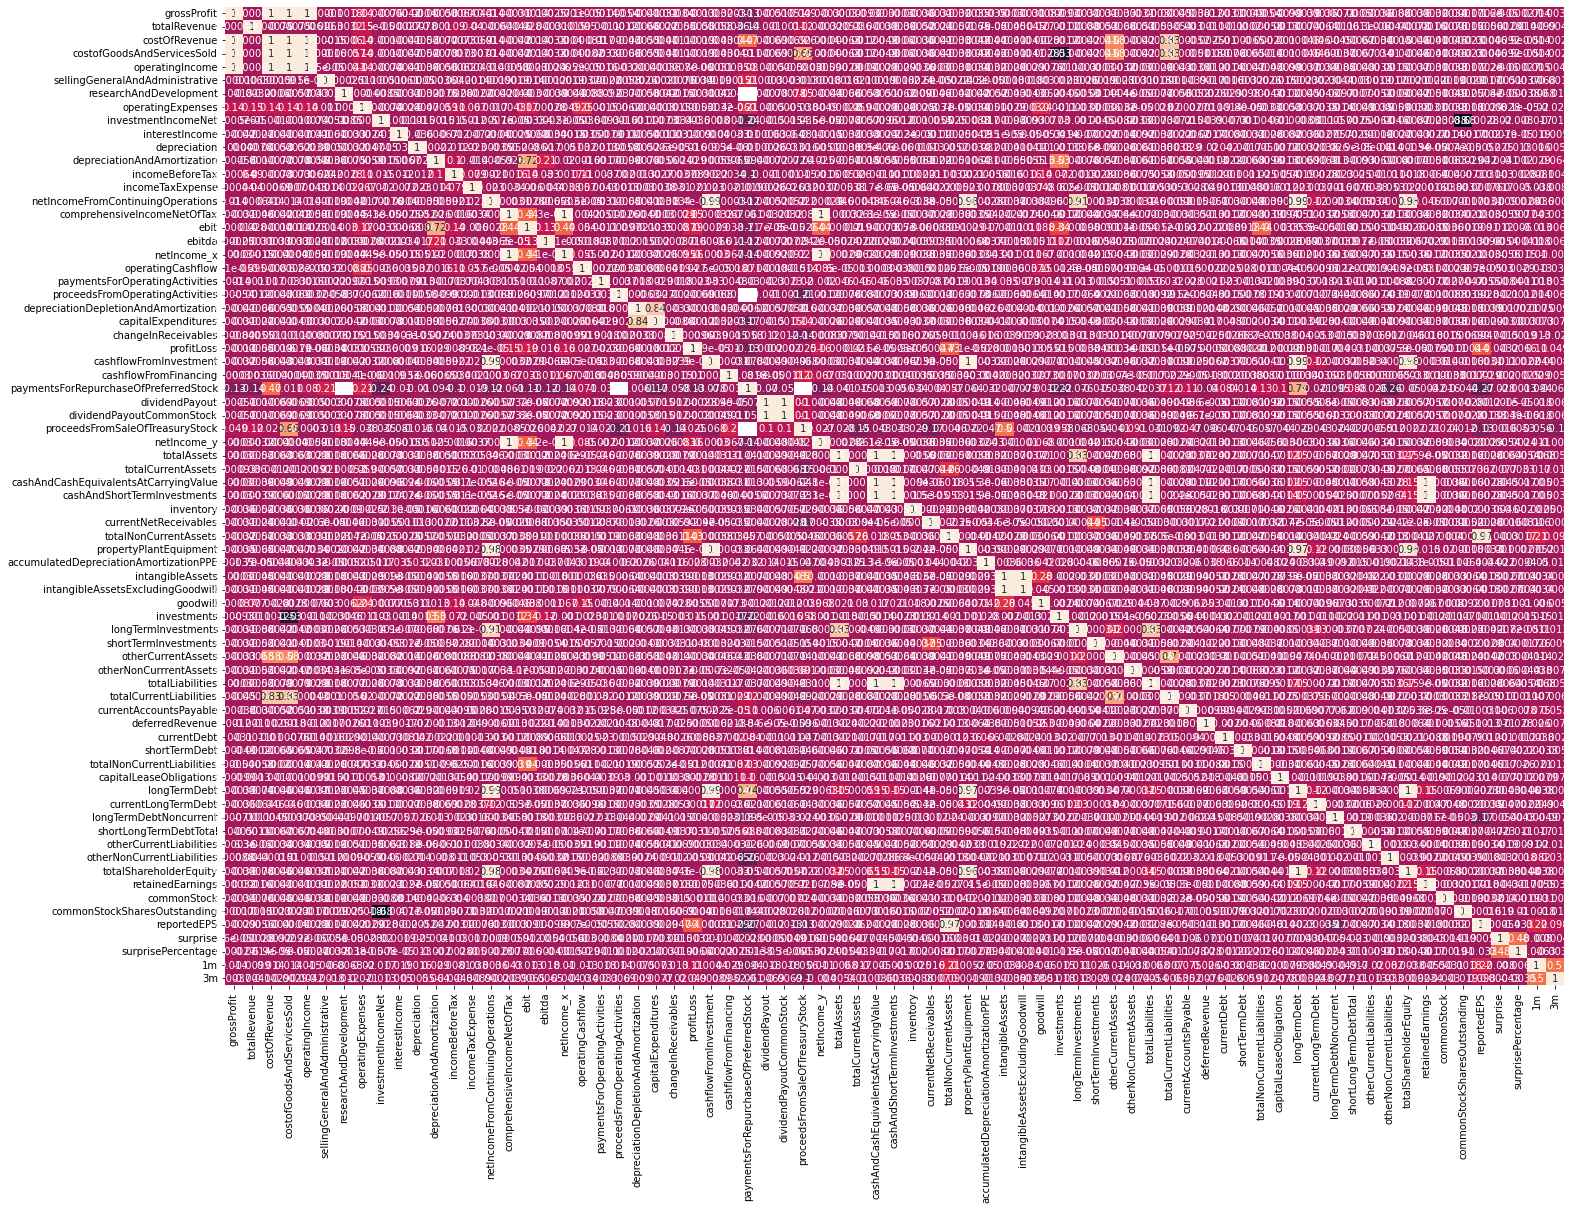

In [147]:
# correlation calculation
feature_corr = final_df.copy().corr()

# sorting and using 1m
sortedDesc = feature_corr["1m"].sort_values(ascending=False) 
print(sortedDesc.head(15))

plt.figure(figsize = (24,18))
sns.heatmap(feature_corr, annot=True, cbar=False, )

3m                                       1.000000
1m                                       0.495484
reportedEPS                              0.098482
totalNonCurrentAssets                    0.090326
depreciationAndAmortization              0.064425
currentAccountsPayable                   0.051502
profitLoss                               0.048603
otherNonCurrentLiabilities               0.032611
longTermInvestments                      0.012941
totalNonCurrentLiabilities               0.012472
totalCurrentAssets                       0.010393
depreciationDepletionAndAmortization     0.008977
shortTermInvestments                     0.008963
capitalLeaseObligations                  0.007809
capitalExpenditures                      0.007736
deferredRevenue                          0.007565
otherNonCurrrentAssets                   0.007378
proceedsFromOperatingActivities          0.006942
ebitda                                   0.006534
ebit                                     0.006491


<AxesSubplot:>

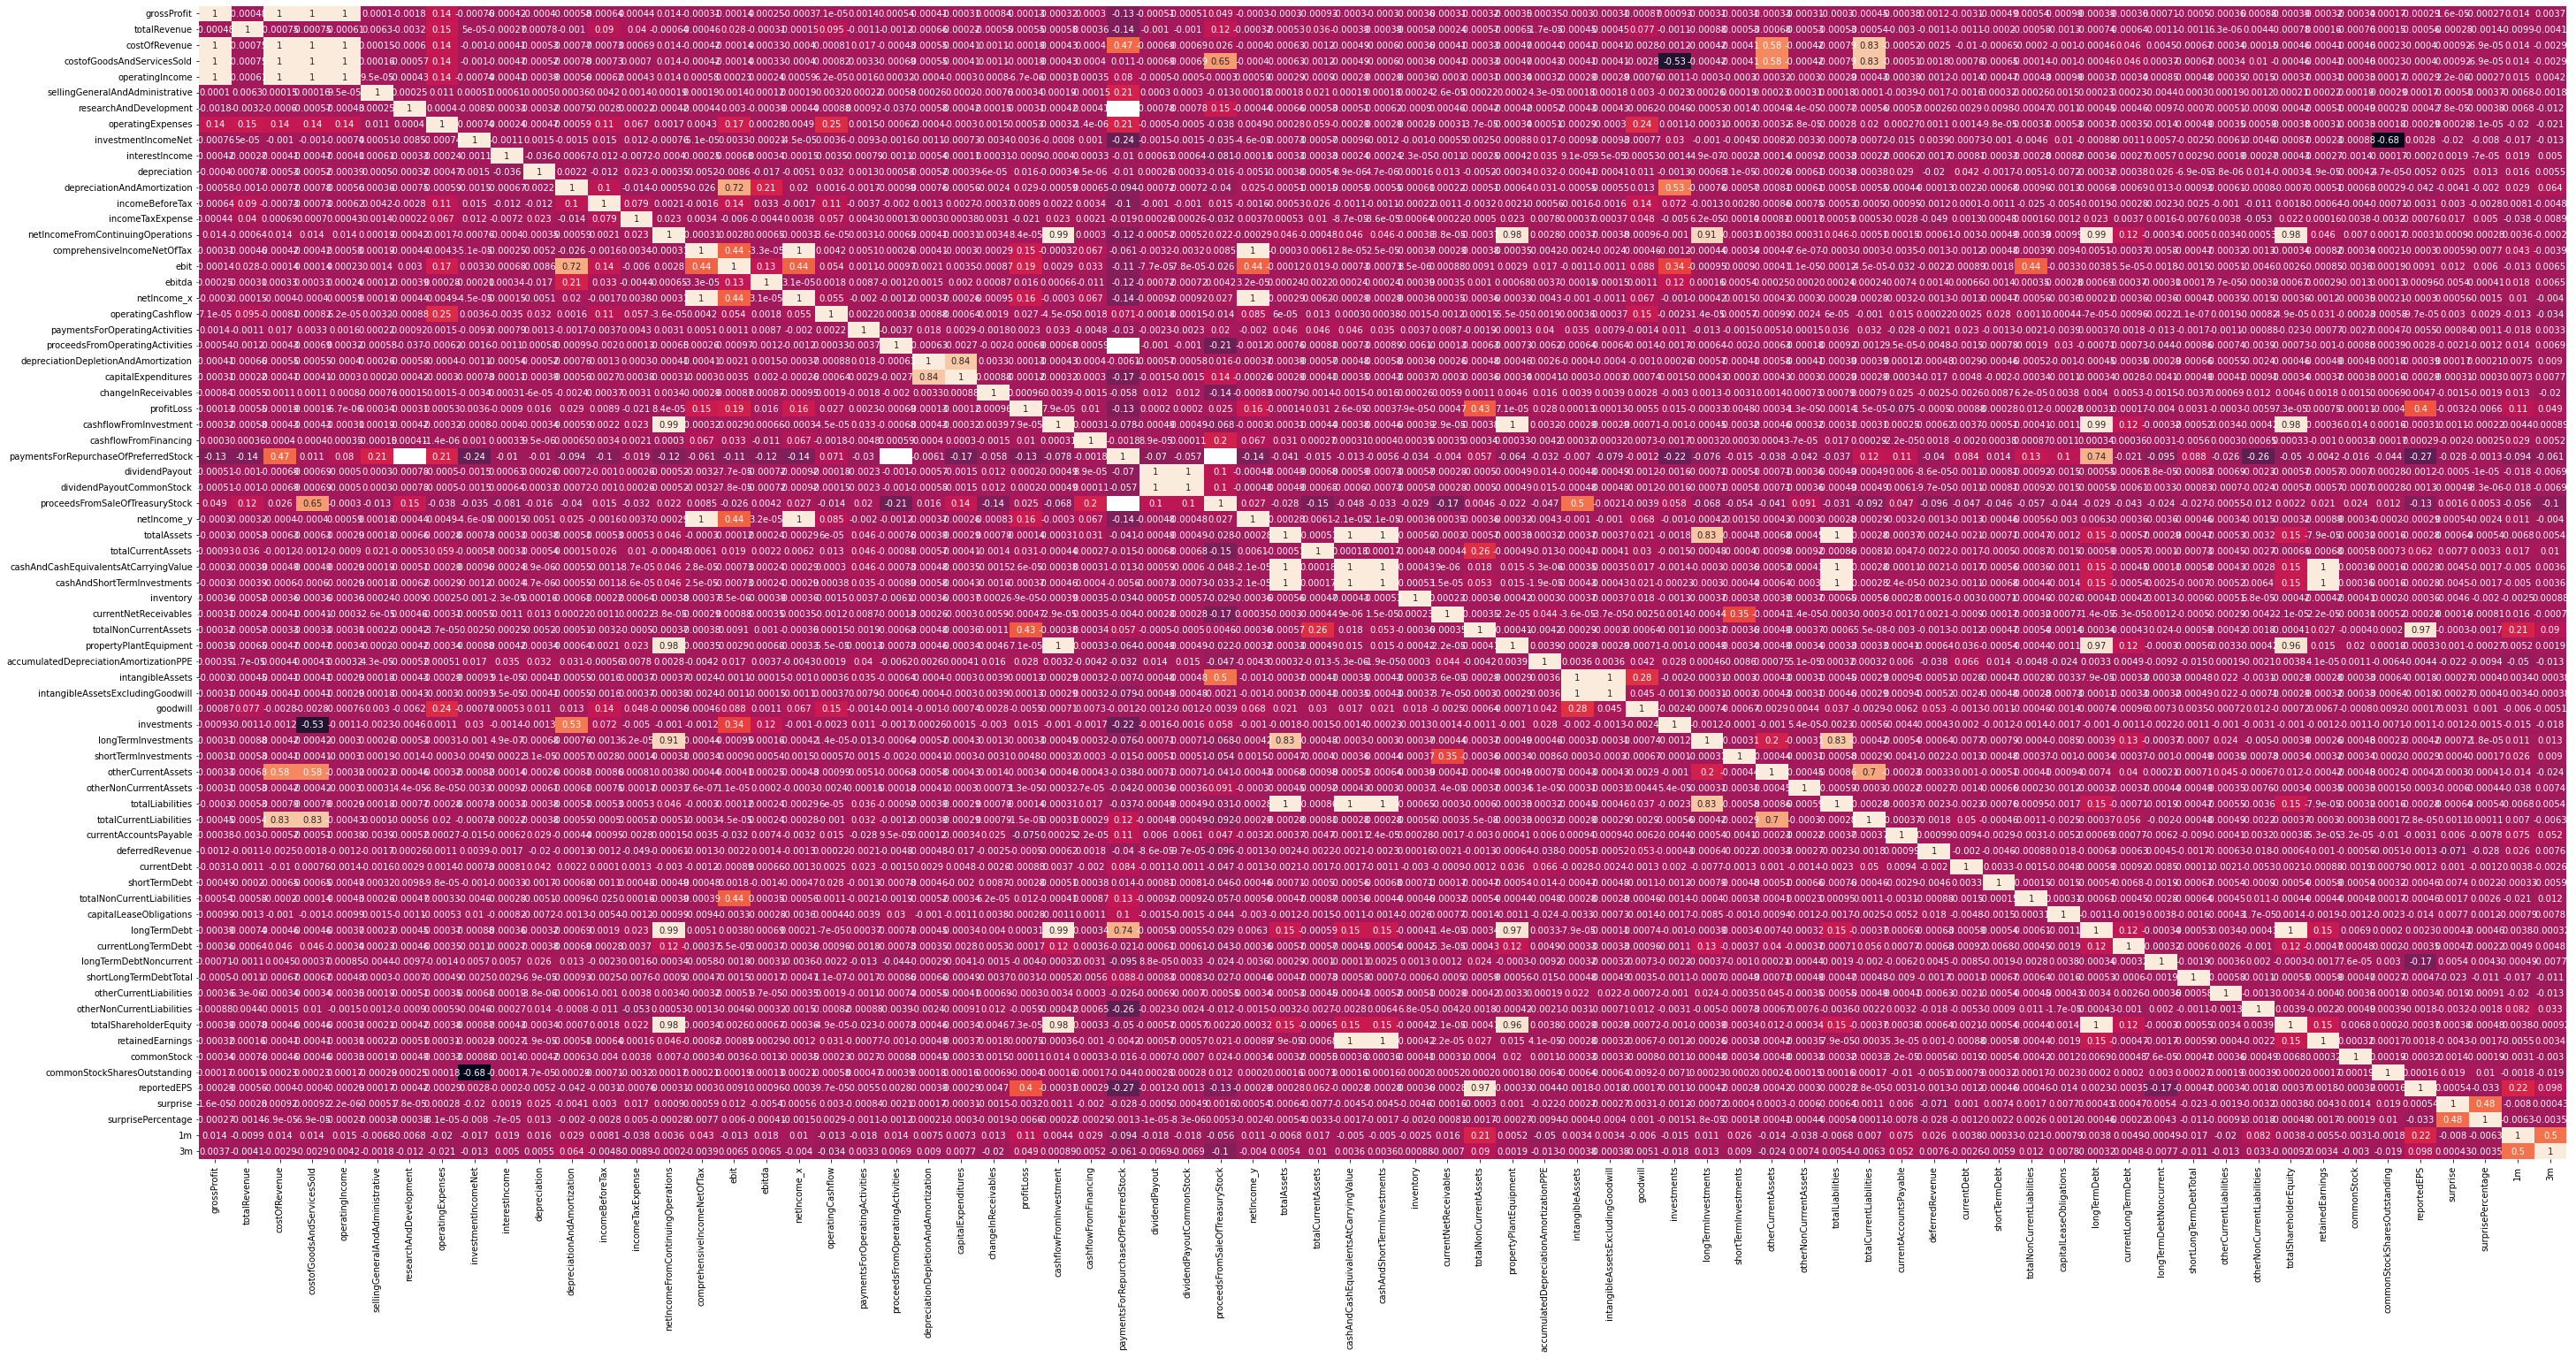

In [145]:
# sorting and using 3m
sortedDesc = feature_corr["3m"].sort_values(ascending=False) 
print(sortedDesc.head(50))

plt.figure(figsize = (48,24))
sns.heatmap(feature_corr, annot=True, cbar=False, )